In [7]:
# First we import some necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# The following function creates the sine wave data 
def sine_wave(i):
    X = np.arange(-2,2,0.001) 
    y = np.sin(X* i * np.pi/4)
    return X,y

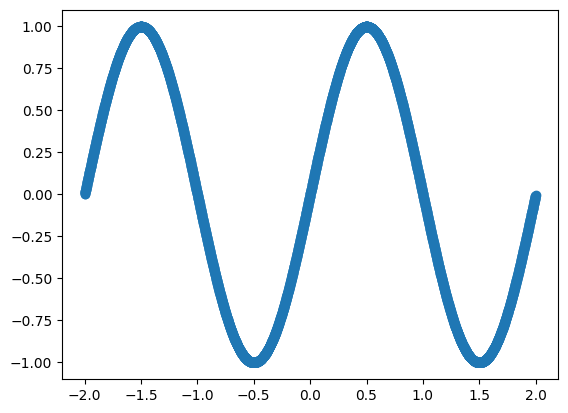

In [3]:
# Plot a sample of the sine wave function  
X, y = sine_wave(4)
plt.scatter(X, y)
plt.show()

In [6]:
# The following function builds a multilayer perceptron with one hidden layer
def build_network(num_hidden):
    inp = tf.keras.Input(shape=(1,))   
    hidden = tf.keras.layers.Dense(num_hidden, activation='sigmoid')(inp)    
    outp = tf.keras.layers.Dense(1)(hidden)    
    model = tf.keras.Model(inputs=inp, outputs=outp, name='sine_model')
    return model

In [29]:
# The following function runs training for a given set of arguments.
def train(num_hidden,i):
    model = build_network(num_hidden)
    X,y = sine_wave(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  
        loss=tf.keras.losses.MeanSquaredError()
    )
    history = model.fit(X_train,y_train,epochs=50,verbose=False)
    average_training_loss = np.mean(history.history['loss'])
    predictions = model.predict(X_test)
    return average_training_loss, X_test, predictions, y_test

25/25 [==============================] - 0s 1ms/step


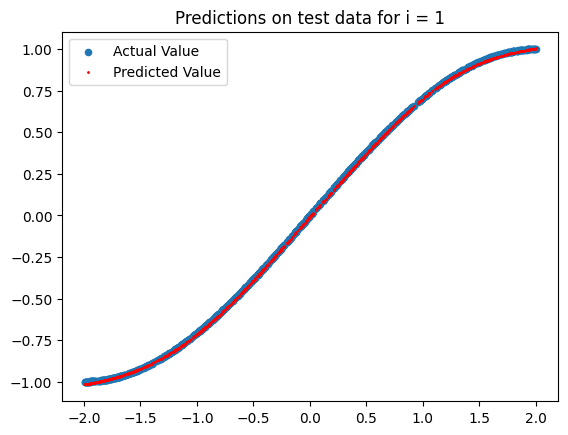

25/25 [==============================] - 0s 2ms/step


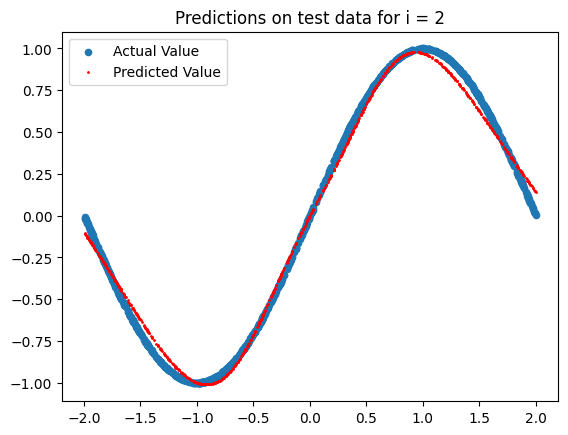

25/25 [==============================] - 0s 2ms/step


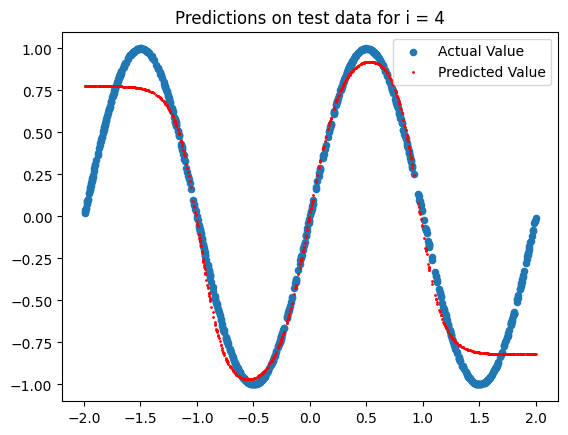

25/25 [==============================] - 0s 1ms/step


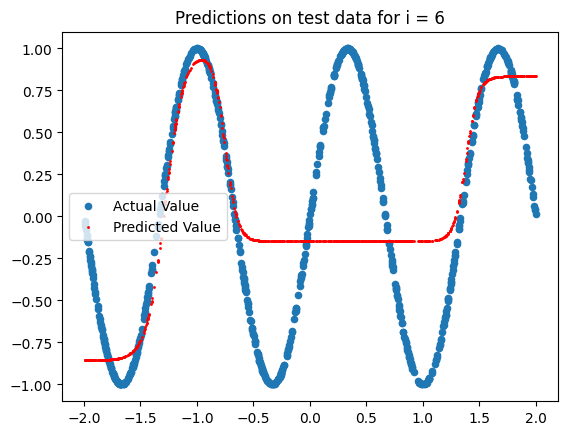

25/25 [==============================] - 0s 2ms/step


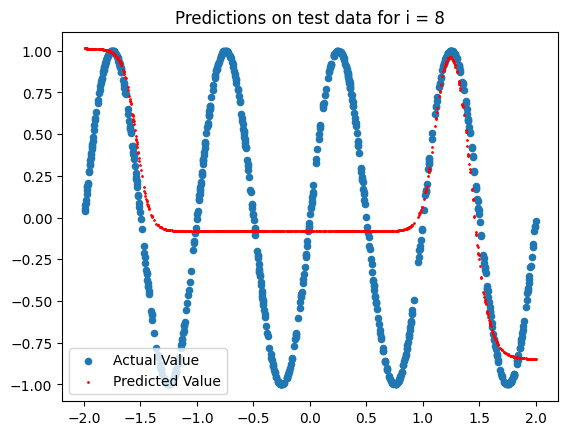

In [35]:
avgs = []
for i in [1, 2, 4, 6, 8,]:
    average_training_loss, X_test, predictions, y_test = train(3, i)
    avgs.append(average_training_loss)
    fig, ax = plt.subplots()
    ax.scatter(X_test, y_test, label='Actual Value', s=20)
    ax.scatter(X_test, predictions, c='r',label='Predicted Value', s=1)
    ax.set_title(f'Predictions on test data for i = {i}')
    ax.legend()
    plt.show()

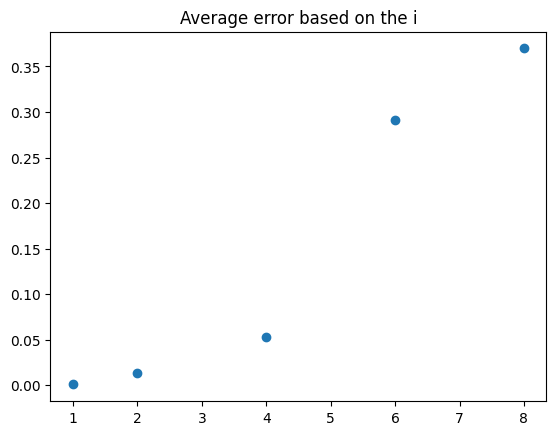

In [36]:
fig, ax = plt.subplots()
ax.scatter([1, 2, 4, 6, 8,], avgs)
ax.set_title(f'Average error based on the i')
plt.show()

25/25 [==============================] - 0s 2ms/step


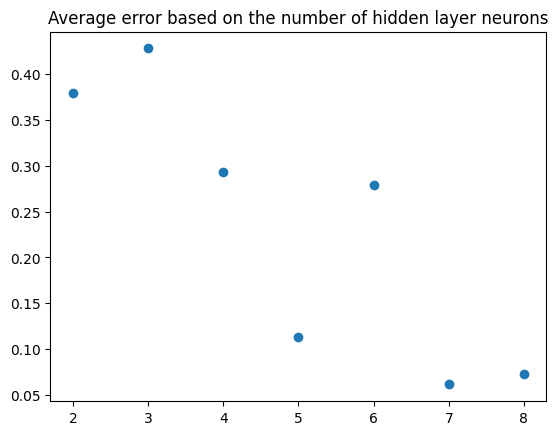

In [37]:
ranges = range(2, 9)
avgs = []
for i in ranges:
    average_training_loss, X_test, predictions, y_test = train(i, 6)
    avgs.append(average_training_loss)
fig, ax = plt.subplots()
ax.scatter(ranges, avgs)
ax.set_title(f'Average error based on the number of hidden layer neurons')
plt.show()